In [2]:
import pandas as pd 

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.29/data_sum.xlsx")

data

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left),FORCE_B(Right),FSR DATA_B(Right)
0,1.245014,1.529382,-0.886157,1.361804,2.277552,1.757358
1,1.274000,1.749337,-1.368345,1.264316,2.319914,1.524890
2,1.389941,1.748738,-1.086286,1.166829,2.447001,1.524890
3,1.254676,1.777098,-1.389048,0.874366,2.531726,1.292421
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
608,2.037281,0.870283,0.317515,1.069341,1.472665,-0.334861
609,1.969648,0.872209,0.349021,1.166829,0.413604,-0.102392
610,1.998633,1.085799,0.020937,1.069341,1.345578,0.362545
611,1.902016,0.930805,0.082657,0.776878,1.049041,1.059952


In [3]:
data.isnull().sum()

FORCE_C(Left)           265
X COORDINATE_C(Left)    265
Y COORDINATE_C(Left)    265
FSR DATA_C(Left)        265
FORCE_B(Right)          265
FSR DATA_B(Right)       265
dtype: int64

In [4]:
print(265/613)

0.43230016313213704


FORCE_C(Left)


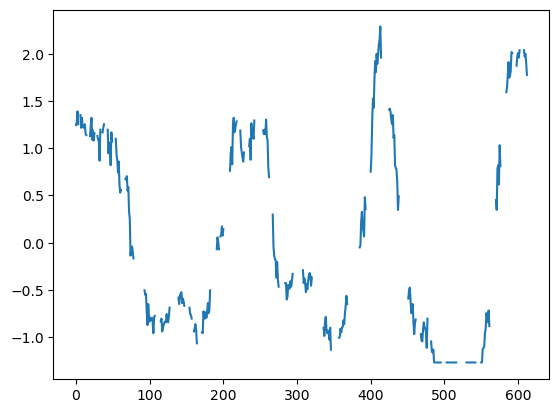

X COORDINATE_C(Left)


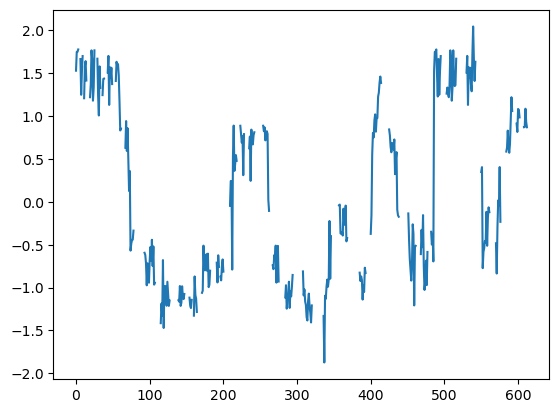

Y COORDINATE_C(Left)


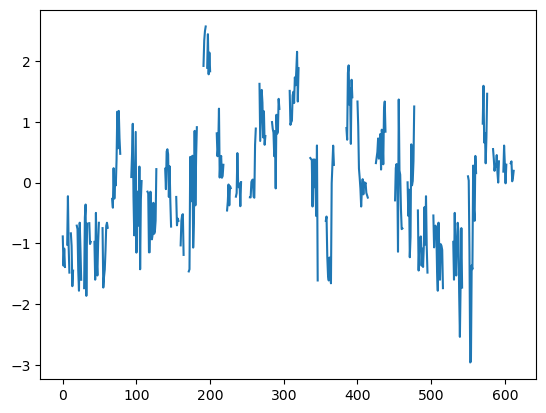

FSR DATA_C(Left)


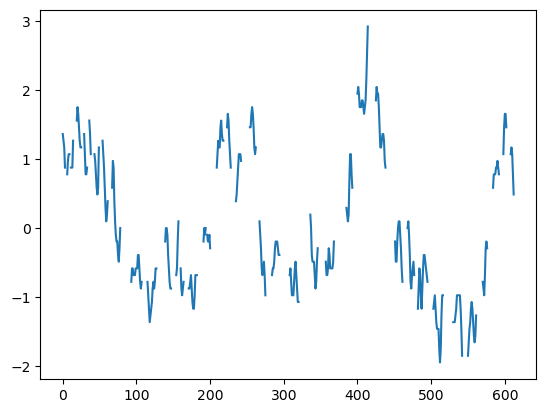

FORCE_B(Right)


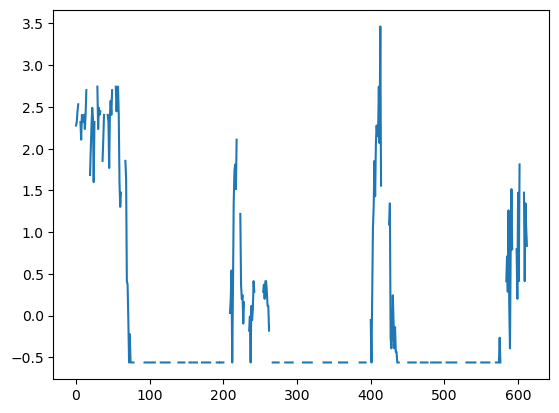

FSR DATA_B(Right)


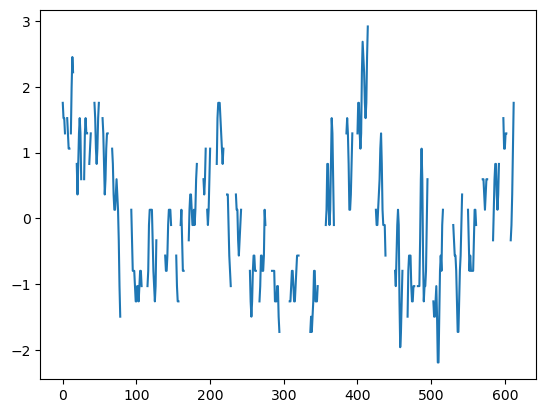

In [5]:

import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    
    
    

In [6]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.29/squart.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

In [7]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left)','FSR DATA_C(Left)']]

<Axes: >

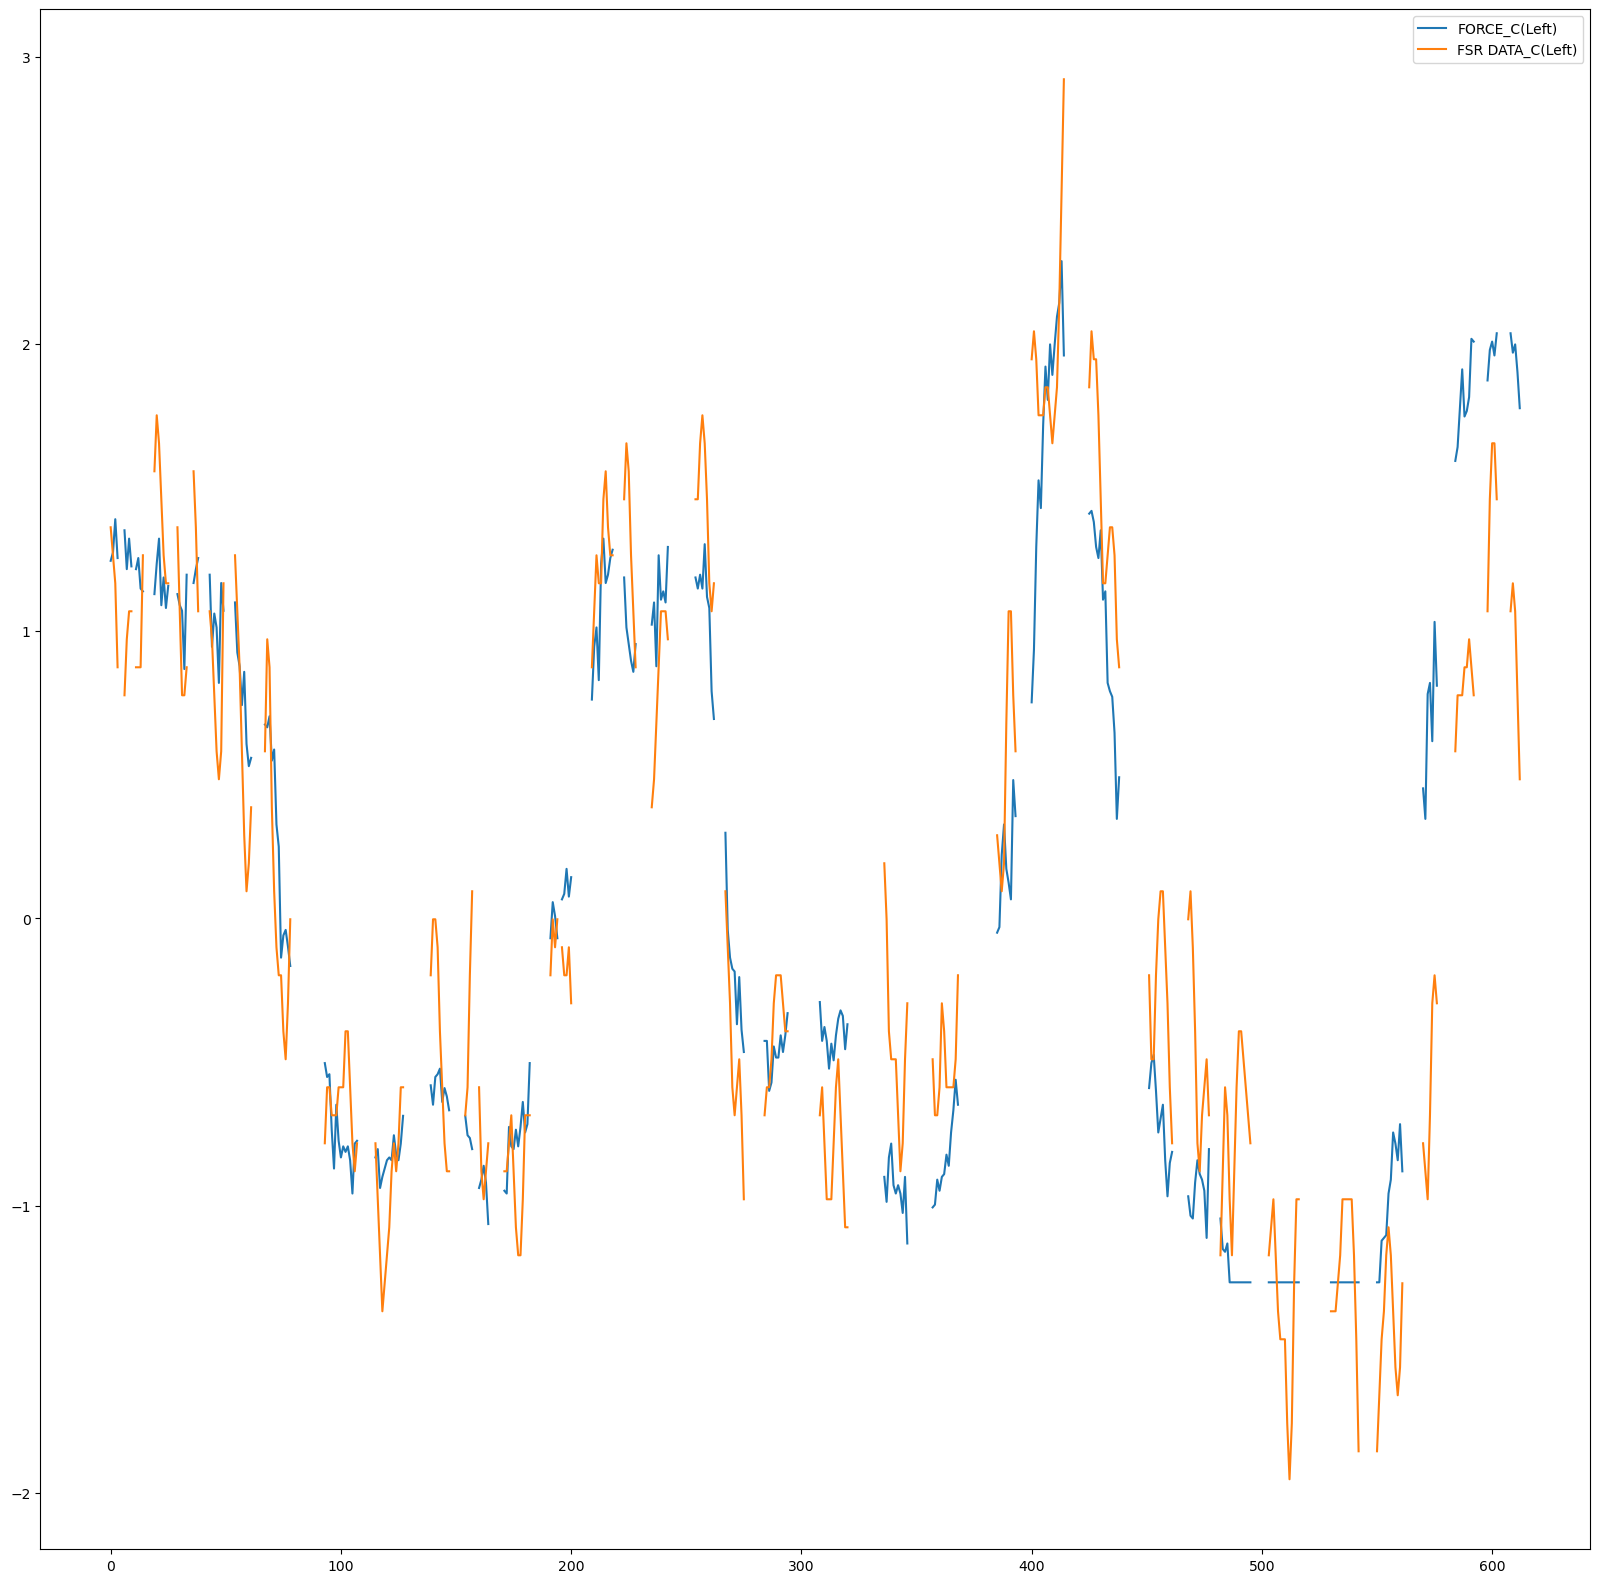

In [8]:
L.plot(figsize=(20,20))

<Axes: >

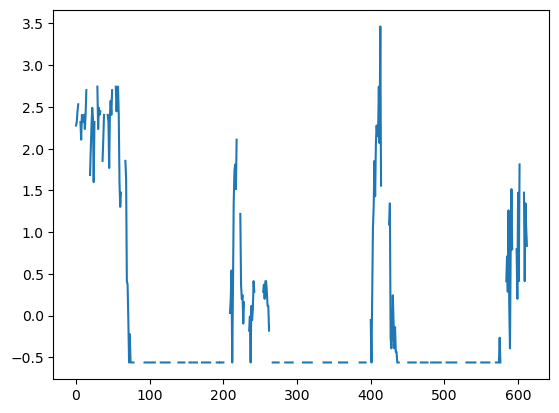

In [9]:
R['FORCE_B(Right)'].plot()

<Axes: >

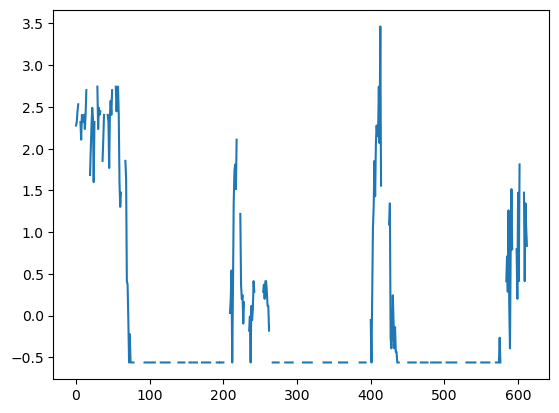

In [10]:
R['FORCE_B(Right)'].plot()

<Axes: >

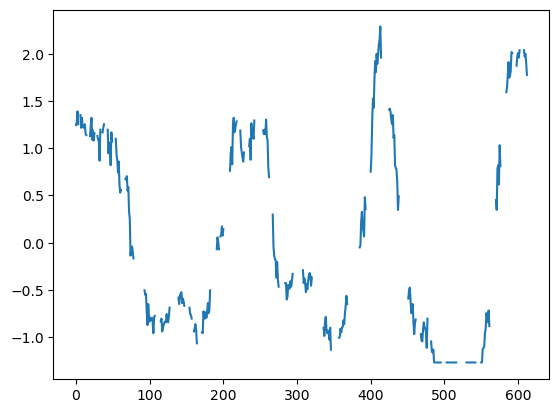

In [11]:
L['FORCE_C(Left)'].plot()

<Axes: >

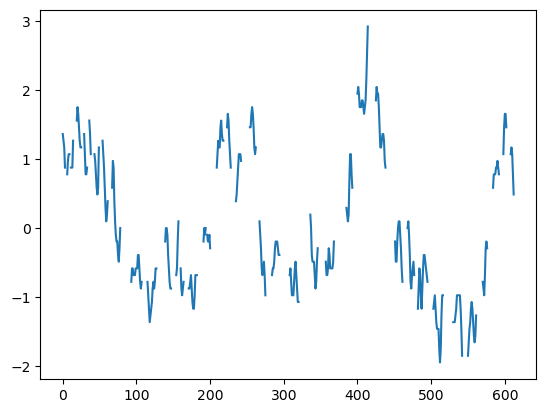

In [12]:
L['FSR DATA_C(Left)'].plot()

In [13]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [14]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [15]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_L_FSR_C=L.iloc[normal_index_L_FSR_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [16]:
print(x_train_R_FORECE_B.shape)

(348, 1)


In [17]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(348, 1)
(348,)


In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM



model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(348, 1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')

In [19]:
model.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=1000,batch_size=1,verbose=2)
pred=model.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/1000


2023-10-30 09:47:50.675524: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


348/348 - 0s - loss: 1.5773 - 446ms/epoch - 1ms/step
Epoch 2/1000
348/348 - 0s - loss: 1.1983 - 136ms/epoch - 392us/step
Epoch 3/1000
348/348 - 0s - loss: 1.1111 - 129ms/epoch - 372us/step
Epoch 4/1000
348/348 - 0s - loss: 1.3193 - 136ms/epoch - 389us/step
Epoch 5/1000
348/348 - 0s - loss: 1.1218 - 142ms/epoch - 408us/step
Epoch 6/1000
348/348 - 0s - loss: 1.1633 - 132ms/epoch - 378us/step
Epoch 7/1000
348/348 - 0s - loss: 1.0490 - 132ms/epoch - 379us/step
Epoch 8/1000
348/348 - 0s - loss: 1.1398 - 131ms/epoch - 377us/step
Epoch 9/1000
348/348 - 0s - loss: 1.2010 - 132ms/epoch - 378us/step
Epoch 10/1000
348/348 - 0s - loss: 1.2151 - 131ms/epoch - 377us/step
Epoch 11/1000
348/348 - 0s - loss: 1.2430 - 131ms/epoch - 376us/step
Epoch 12/1000
348/348 - 0s - loss: 1.0351 - 130ms/epoch - 375us/step
Epoch 13/1000
348/348 - 0s - loss: 1.1452 - 131ms/epoch - 376us/step
Epoch 14/1000
348/348 - 0s - loss: 1.0976 - 132ms/epoch - 380us/step
Epoch 15/1000
348/348 - 0s - loss: 1.0592 - 131ms/epoch - 

In [20]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

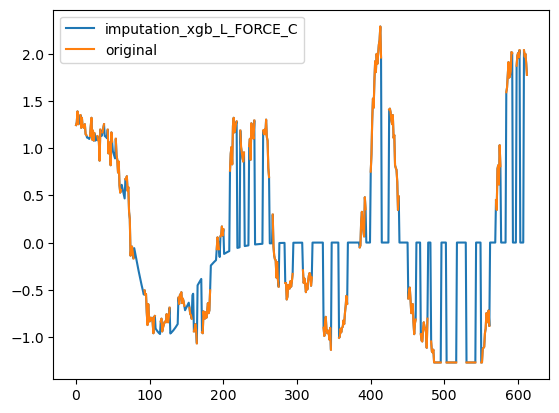

In [21]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_xgb_L_FORCE_C')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [22]:
model.fit(x_train_R_FSR_B,y_train_L_FSR_C,epochs=1000,batch_size=1,verbose=2)
pred=model.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/1000
348/348 - 0s - loss: 0.8598 - 212ms/epoch - 609us/step
Epoch 2/1000
348/348 - 0s - loss: 0.8568 - 153ms/epoch - 440us/step
Epoch 3/1000
348/348 - 0s - loss: 0.8543 - 147ms/epoch - 422us/step
Epoch 4/1000
348/348 - 0s - loss: 0.8513 - 145ms/epoch - 417us/step
Epoch 5/1000
348/348 - 0s - loss: 0.8527 - 149ms/epoch - 427us/step
Epoch 6/1000
348/348 - 0s - loss: 0.8534 - 161ms/epoch - 463us/step
Epoch 7/1000
348/348 - 0s - loss: 0.8529 - 147ms/epoch - 422us/step
Epoch 8/1000
348/348 - 0s - loss: 0.8543 - 162ms/epoch - 464us/step
Epoch 9/1000
348/348 - 0s - loss: 0.8528 - 152ms/epoch - 438us/step
Epoch 10/1000
348/348 - 0s - loss: 0.8560 - 160ms/epoch - 459us/step
Epoch 11/1000
348/348 - 0s - loss: 0.8546 - 172ms/epoch - 494us/step
Epoch 12/1000
348/348 - 0s - loss: 0.8492 - 157ms/epoch - 450us/step
Epoch 13/1000
348/348 - 0s - loss: 0.8510 - 148ms/epoch - 426us/step
Epoch 14/1000
348/348 - 0s - loss: 0.8532 - 143ms/epoch - 410us/step
Epoch 15/1000
348/348 - 0s - loss: 0.8488 -

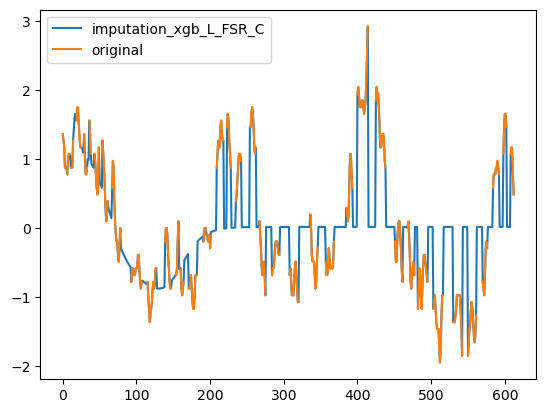

In [23]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_xgb_L_FSR_C')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [24]:
L.isnull().sum()



FORCE_C(Left)       265
FSR DATA_C(Left)    265
dtype: int64

In [25]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left)'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

<Axes: >

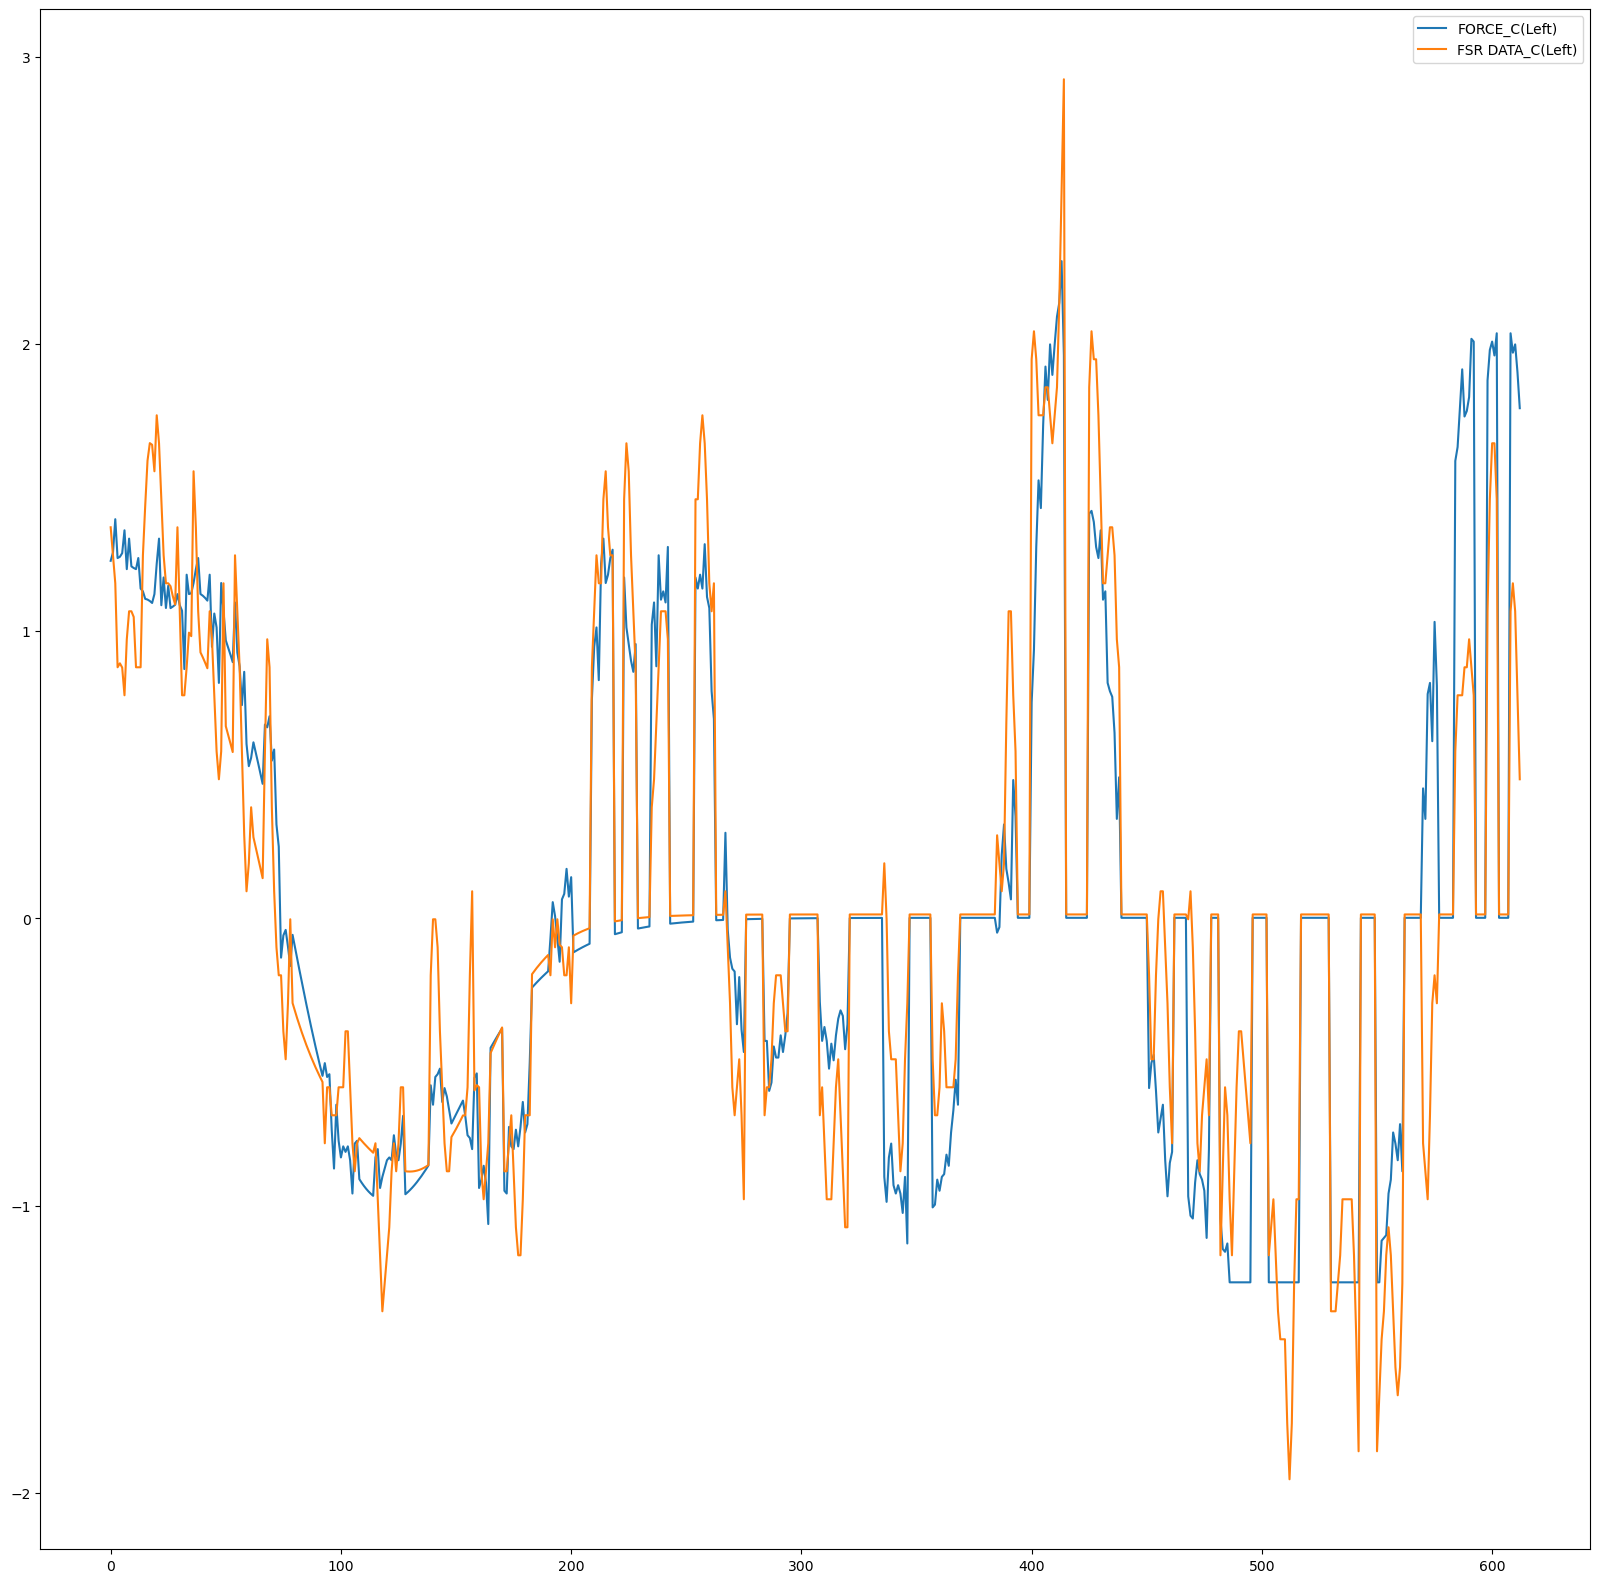

In [26]:
L.plot(figsize=(20,20))

<Axes: >

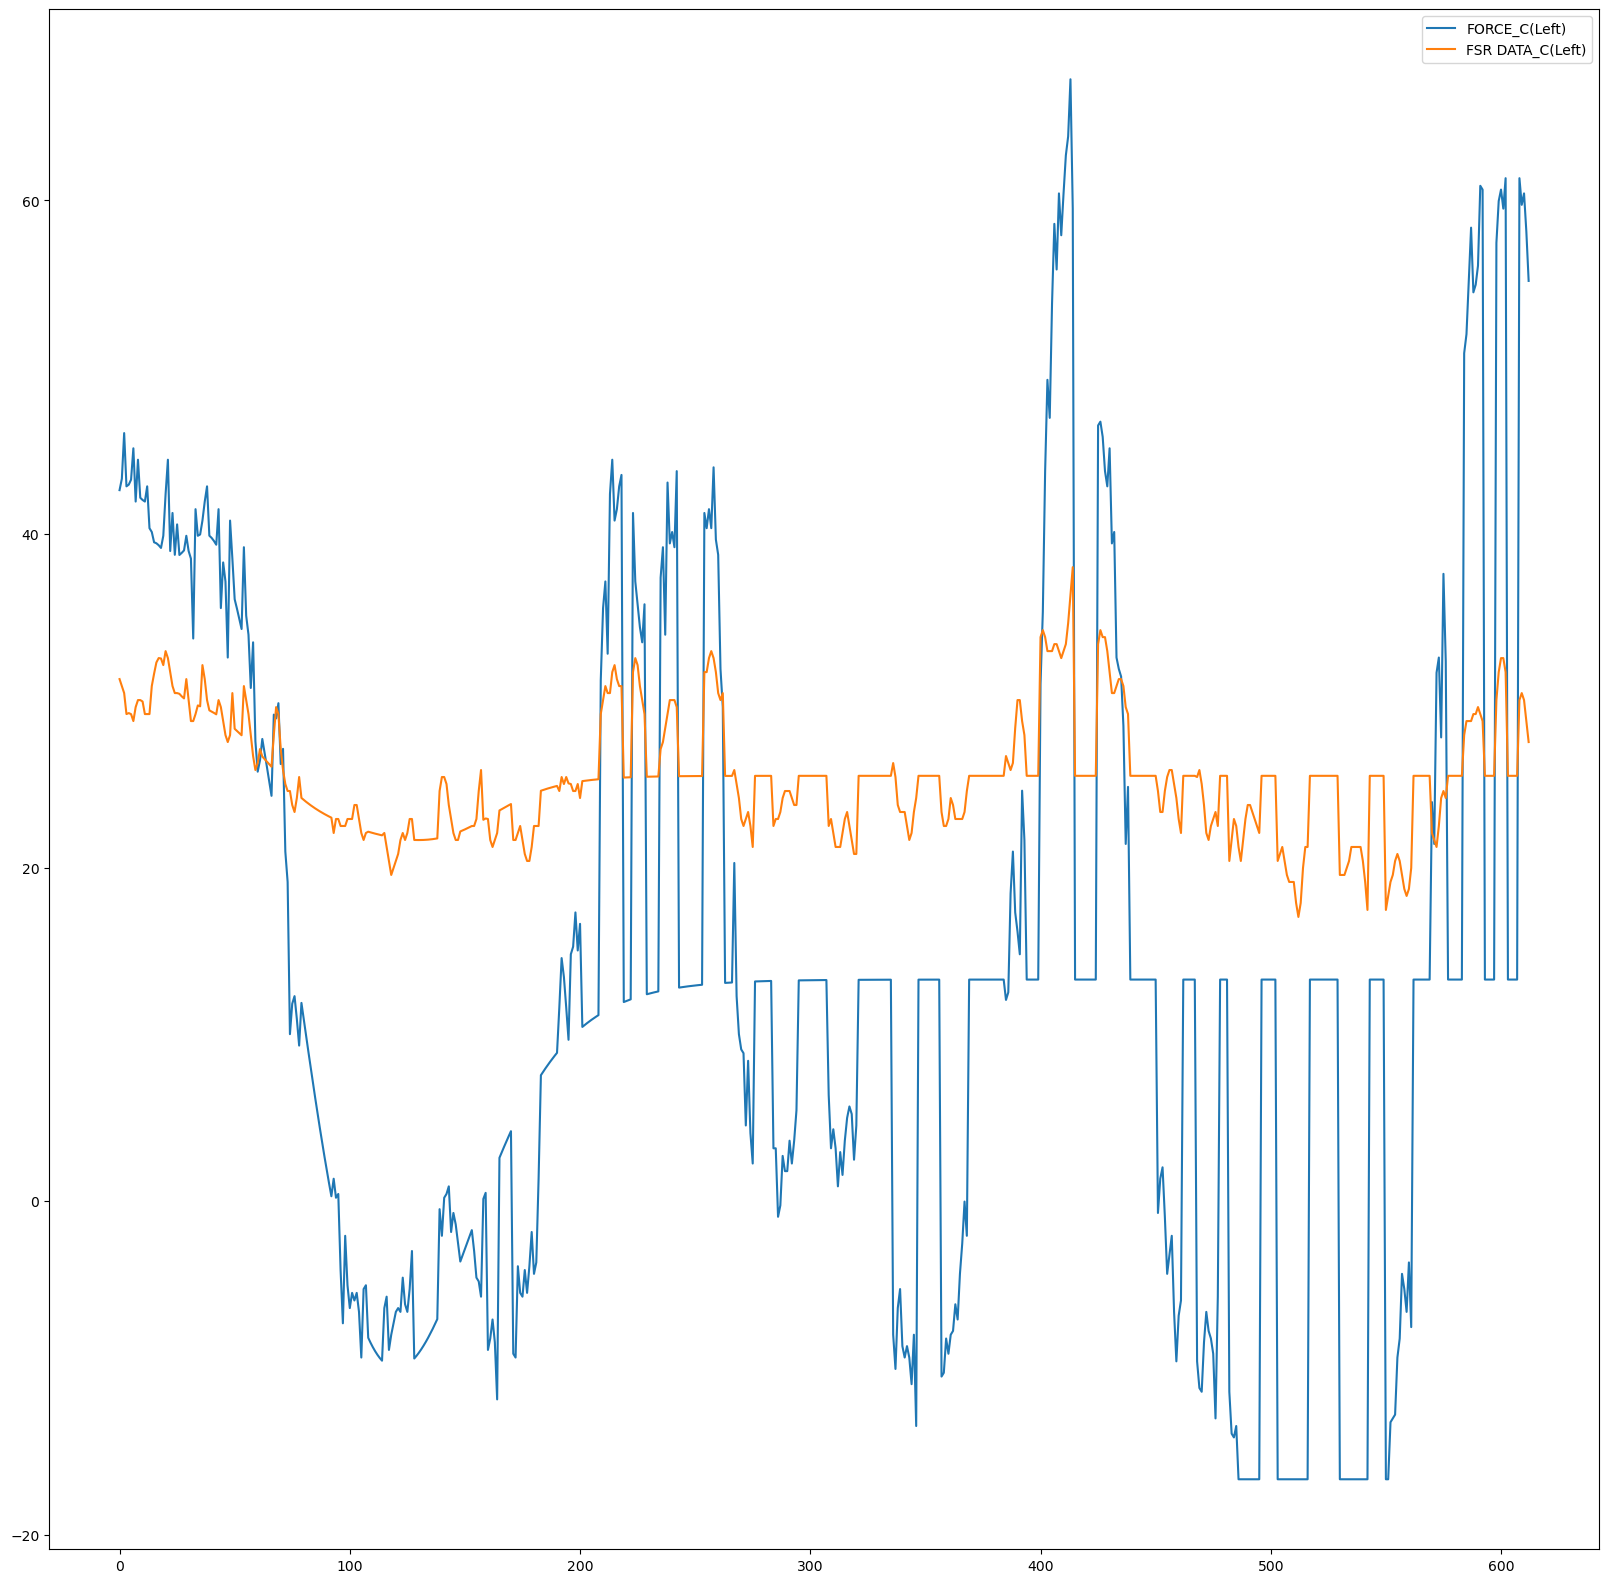

In [27]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot(figsize=(20,20))
